In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Wholesale customers data.csv')
labels = df['Region']
data = df.drop(columns=['Region'])

scaler = StandardScaler()
data = scaler.fit_transform(data)

In [3]:

input_dim = data.shape[1]
encoding_dim_2d = 2

input_layer = Input(shape=(input_dim,))
encoded_2d = Dense(encoding_dim_2d, activation='relu')(input_layer)
decoded_2d = Dense(input_dim, activation='sigmoid')(encoded_2d)

autoencoder_2d = Model(input_layer, decoded_2d)
encoder_2d = Model(input_layer, encoded_2d)
autoencoder_2d.compile(optimizer='adam', loss='mse')

autoencoder_2d.fit(data, data, epochs=150, batch_size=16, shuffle=True, verbose=1)

encoded_data_2d = encoder_2d.predict(data)

Epoch 1/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0985
Epoch 2/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.43431
Epoch 3/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.18932
Epoch 4/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2627
Epoch 5/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3137
Epoch 6/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0681  
Epoch 7/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1941 
Epoch 8/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9599 
Epoch 9/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0900 
Epoch 10/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0403
Epoch 11/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3143
Epoch 12/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8621
Epoch 13/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9130
Epoch 14/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1234
Epoch 15/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.80

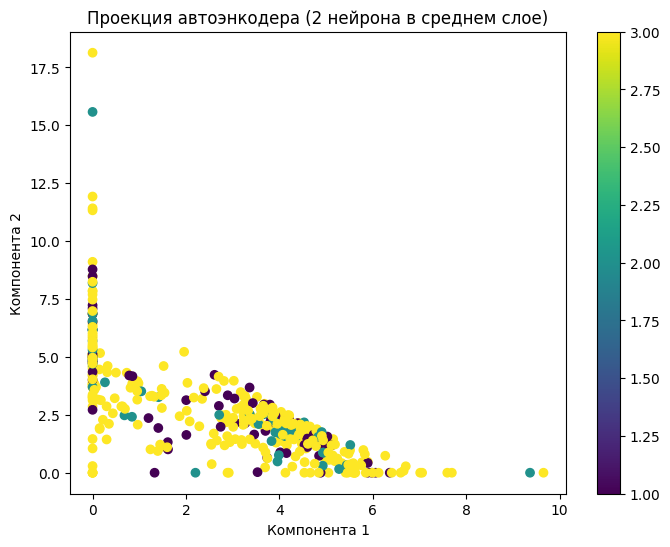

In [4]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(encoded_data_2d[:, 0], encoded_data_2d[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.title('Проекция автоэнкодера (2 нейрона в среднем слое)')
plt.show()

In [5]:
encoding_dim_3d = 3

encoded_3d = Dense(encoding_dim_3d, activation='relu')(input_layer)
decoded_3d = Dense(input_dim, activation='sigmoid')(encoded_3d)

autoencoder_3d = Model(input_layer, decoded_3d)
encoder_3d = Model(input_layer, encoded_3d)
autoencoder_3d.compile(optimizer='adam', loss='mse')

autoencoder_3d.fit(data, data, epochs=150, batch_size=16, shuffle=True, verbose=1)

encoded_data_3d = encoder_3d.predict(data)

Epoch 1/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.2399   
Epoch 2/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3001
Epoch 3/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3904  
Epoch 4/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3408  
Epoch 5/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1777  
Epoch 6/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1610  
Epoch 7/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1342  
Epoch 8/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0176
Epoch 9/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2498
Epoch 10/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2285
Epoch 11/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0340
Epoch 12/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0732 
Epoch 13/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0209  
Epoch 14/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9308
Epoch 15/150
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - l

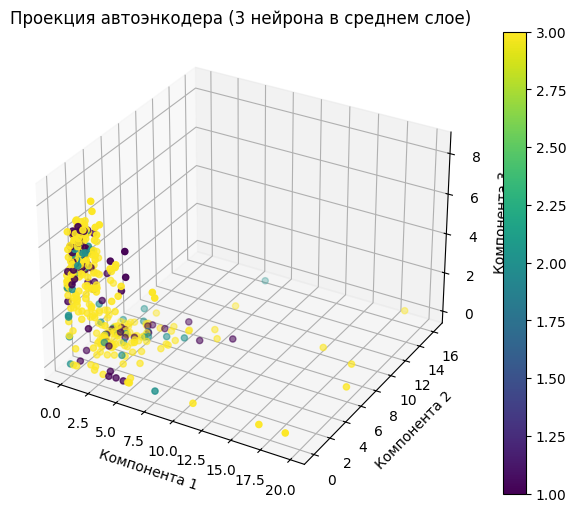

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(encoded_data_3d[:, 0], encoded_data_3d[:, 1], encoded_data_3d[:, 2], c=labels, cmap='viridis')
fig.colorbar(scatter)
ax.set_xlabel('Компонента 1')
ax.set_ylabel('Компонента 2')
ax.set_zlabel('Компонента 3')
ax.set_title('Проекция автоэнкодера (3 нейрона в среднем слое)')
plt.show()

In [12]:
from sklearn.manifold import TSNE

In [13]:
tsne_2d = TSNE(n_components=2)
tsne_proj_2d = tsne_2d.fit_transform(data)

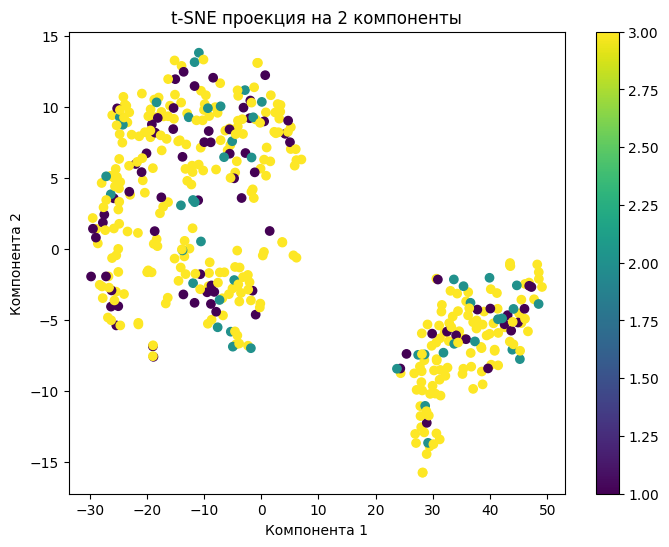

In [14]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_proj_2d[:, 0], tsne_proj_2d[:, 1], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.xlabel('Компонента 1')
plt.ylabel('Компонента 2')
plt.title('t-SNE проекция на 2 компоненты')
plt.show()

In [10]:
tsne_3d = TSNE(n_components=3)
tsne_proj_3d = tsne_3d.fit_transform(data)

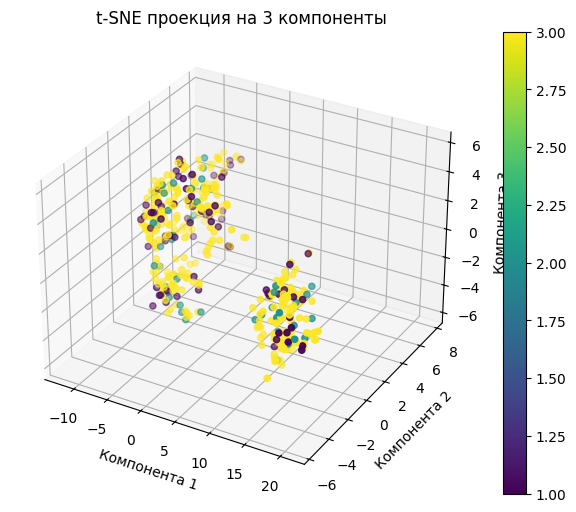

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(tsne_proj_3d[:, 0], tsne_proj_3d[:, 1], tsne_proj_3d[:, 2], c=labels, cmap='viridis')
fig.colorbar(scatter)
ax.set_xlabel('Компонента 1')
ax.set_ylabel('Компонента 2')
ax.set_zlabel('Компонента 3')
ax.set_title('t-SNE проекция на 3 компоненты')
plt.show()